# house prices explorary data analysis 

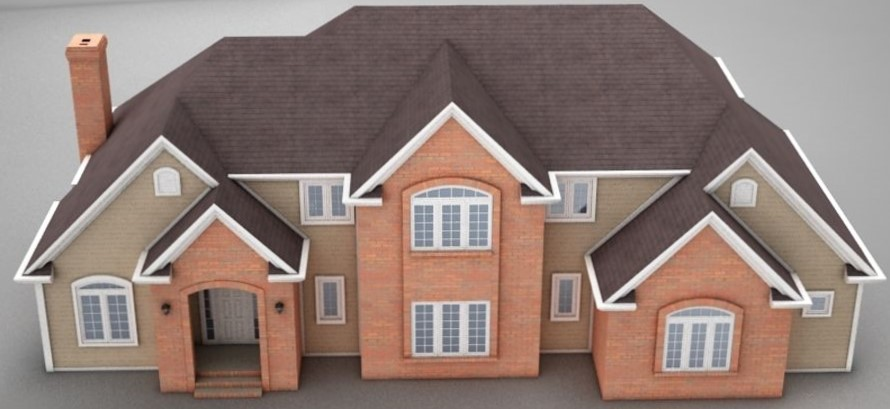

Despite the strange names I gave to the chapters, what we are doing in this kernel is something like:

Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.
Now, it's time to have fun!

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
prices = pd.read_csv('dataset/price.csv')
prices.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
df= prices.copy()

In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [5]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 ** Super! I think I have correctly set my target variable to focus on. It has a pretty good statistic, without any null value. 

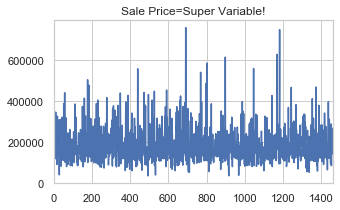

In [6]:
Super= df['SalePrice']
Super.plot(title="Sale Price=Super Variable!",figsize=(5,3));

**I guess you may need to make a lot of effort when you start dating with a super variable. We can not pass without seeing that there is a lot of value between 150000 and 200000. 

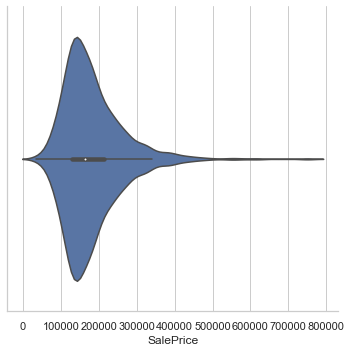

In [7]:
sns.catplot(x="SalePrice", kind="violin",data=df);

Our variable looks great with this graphic representation. Now he is ready to party and can call his friends. I hope they will all join the full party.

In [8]:
print("**Checking the columns in the dataset.**")
len(df.columns), df.columns

**Checking the columns in the dataset.**


(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

categorical variables


In [11]:
category= df.select_dtypes(include="object")
cols= category.columns

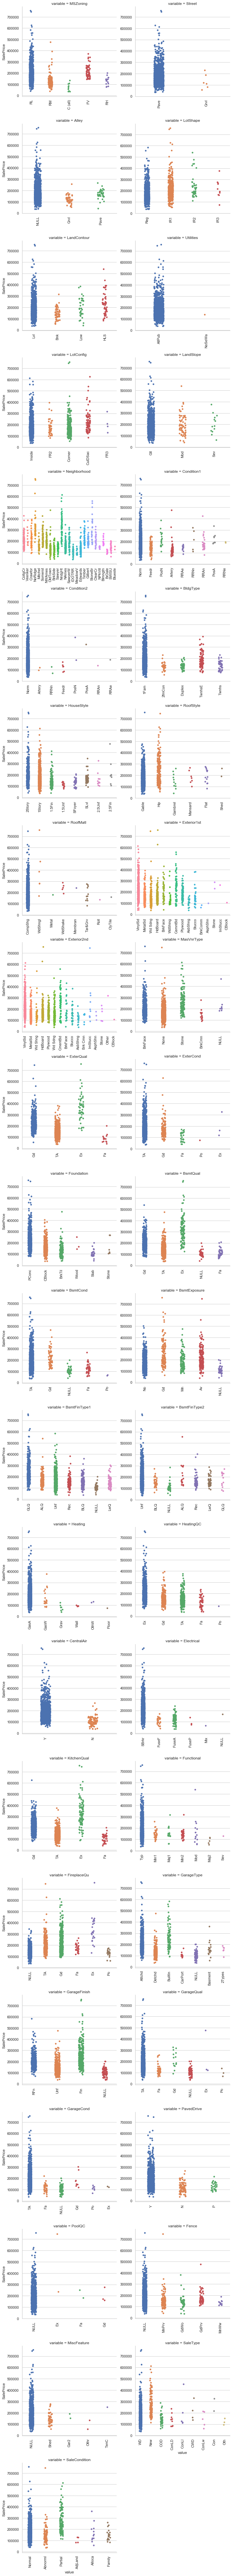

In [37]:
for c in category:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['NULL'])
        df[c] = df[c].fillna('NULL')

def stripplot(x, y, **kwargs):
    sns.stripplot(x=x, y=y, jitter=True)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=category)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(stripplot, "value", "SalePrice")

In [ ]:
for c in category:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['NULL'])
        df[c] = df[c].fillna('NULL')
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=category)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [38]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NULL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NULL,NULL,NULL,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [97]:
colss= prices.columns
null_list=[]
for s in colss :
    if (df[s].isnull().sum()/1460*100)>10:
        null_list.append(s)
print(null_list)

['LotFrontage']


In [94]:
colss= prices.columns
full_list=[]
for s in colss :
    if df[s].value_counts().max()/1460*100>90:
        full_list.append(s)
print(full_list)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


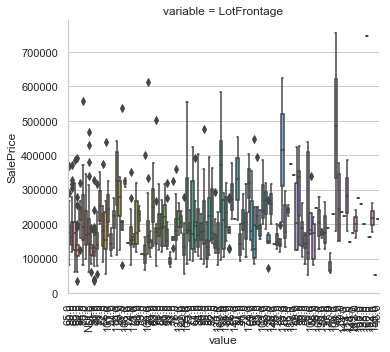

In [99]:
for c in null_list:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['NULL'])
        df[c] = df[c].fillna('NULL')
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=null_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [75]:
df['Alley'].value_counts().max()

1369

In [ ]:
categoricals.describe()

In [ ]:
categoricals.isnull().sum()

In [ ]:
sns.stripplot(x=df["Alley"], y=df["SalePrice"],jitter=True);

In [ ]:
for i in cols :
    print (i,":", category[i].unique())

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

In [ ]:
missing = df.isnull().sum()*100/df.shape[0]
missing = missing[missing >0]# Columns with less than '0' missing value
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
missing1 = missing[missing<1]# Columns with more than 10% missing value
missing1.sort_values(inplace=True)
missing1.plot.bar()

In [ ]:
f_list = ['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']
for col in f_list:
    liste=df[col].unique()
    print(col, liste, '!---colend---!')

In [ ]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    df[col] = df[col].fillna('None')

In [ ]:
f_list = ['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']
for col in f_list:
    liste=df[col].unique()
    print(col, liste, type(col),'!---colend---!')

In [ ]:
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [ ]:
df.info()

In [ ]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
#group by Neigborhood and fill missing value with median Lot frontage of all the neighboorhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))